# Deep Learning Intro

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

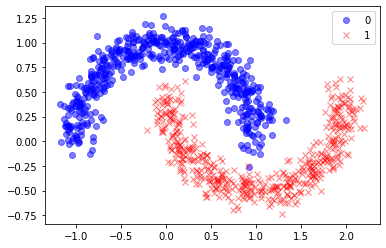

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### Shallow Model

In [0]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
700/700 [==============================] - 0s 53us/step - loss: 0.2244 - acc: 0.8886
Epoch 2/200
700/700 [==============================] - 0s 41us/step - loss: 0.2268 - acc: 0.8886
Epoch 3/200
700/700 [==============================] - 0s 40us/step - loss: 0.2253 - acc: 0.8900
Epoch 4/200
700/700 [==============================] - 0s 42us/step - loss: 0.2252 - acc: 0.8886
Epoch 5/200
700/700 [==============================] - 0s 41us/step - loss: 0.2239 - acc: 0.8886
Epoch 6/200
700/700 [==============================] - 0s 43us/step - loss: 0.2249 - acc: 0.8886
Epoch 7/200
700/700 [==============================] - 0s 44us/step - loss: 0.2245 - acc: 0.8871
Epoch 8/200
700/700 [==============================] - 0s 38us/step - loss: 0.2247 - acc: 0.8886
Epoch 9/200
700/700 [==============================] - 0s 38us/step - loss: 0.2243 - acc: 0.8900
Epoch 10/200
700/700 [==============================] - 0s 40us/step - loss: 0.2264 - acc: 0.8886
Epoch 11/200
700/700 [=======

In [17]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 53us/step


In [18]:
results

[0.317907465895017, 0.8466666674613953]

In [19]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


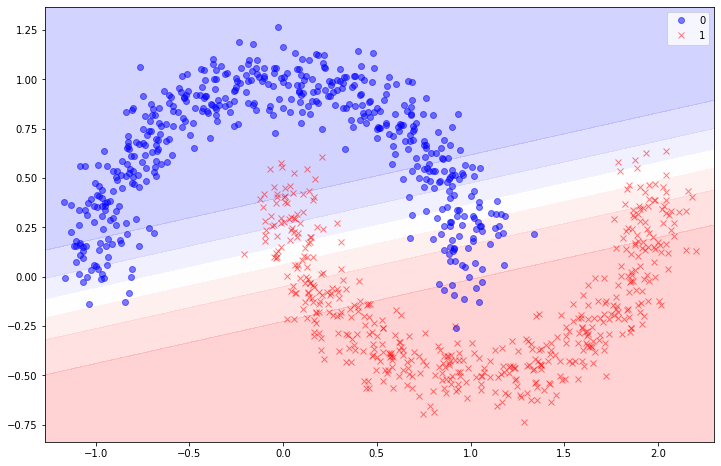

In [20]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [0]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [23]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 288us/step


[0.010428936807438732, 0.9933333333333333]

In [0]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	0.993


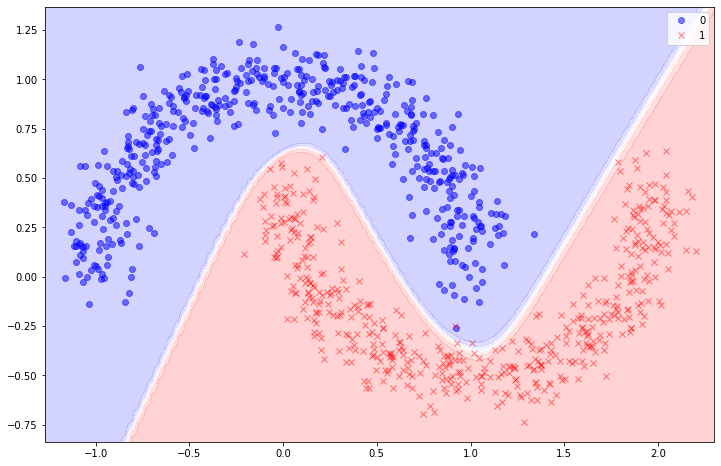

In [26]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Dataweekends/zero_to_deep_learning_video/master/data/iris.csv')

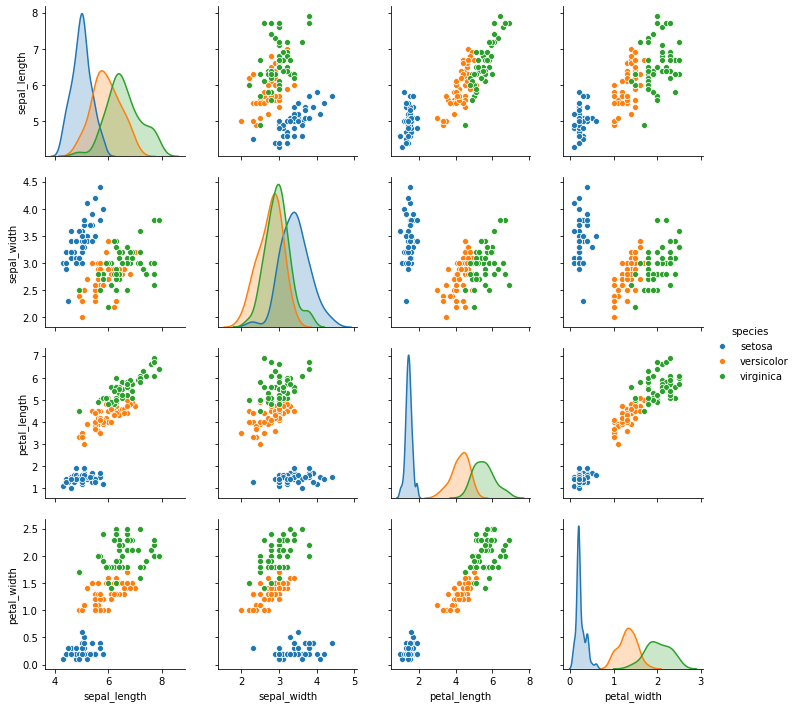

In [29]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [30]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [34]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [0]:
from keras.utils.np_utils import to_categorical

In [0]:
y_cat = to_categorical(y)

In [37]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 3ms/step - loss: 1.1547 - acc: 0.5741 - val_loss: 1.8512 - val_acc: 0.3333
Epoch 2/20
108/108 [==============================] - 0s 83us/step - loss: 0.7893 - acc: 0.7222 - val_loss: 0.3085 - val_acc: 0.9167
Epoch 3/20
108/108 [==============================] - 0s 118us/step - loss: 0.6606 - acc: 0.6574 - val_loss: 0.6779 - val_acc: 0.4167
Epoch 4/20
108/108 [==============================] - 0s 75us/step - loss: 0.6273 - acc: 0.7130 - val_loss: 0.5125 - val_acc: 0.6667
Epoch 5/20
108/108 [==============================] - 0s 80us/step - loss: 0.4997 - acc: 0.7130 - val_loss: 0.2323 - val_acc: 0.9167
Epoch 6/20
108/108 [==============================] - 0s 103us/step - loss: 0.4665 - acc: 0.7407 - val_loss: 0.8124 - val_acc: 0.3333
Epoch 7/20
108/108 [==============================] - 0s 77us/step - loss: 0.4463 - acc: 0.7037 - val_loss: 0.3935 - val_acc: 1.0000
Epoch 8/20
108/108 [===

In [0]:
y_pred = model.predict(X_test)

In [42]:
y_pred[:5]

array([[1.5486480e-03, 4.4466096e-01, 5.5379045e-01],
       [6.0682243e-04, 4.4251817e-01, 5.5687499e-01],
       [1.4101213e-02, 6.6374445e-01, 3.2215428e-01],
       [1.2698149e-02, 8.5071778e-01, 1.3658409e-01],
       [1.5501147e-02, 8.6700338e-01, 1.1749542e-01]], dtype=float32)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.85      0.92      0.88        12
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



In [46]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  8]])